## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

Hola, ya es el último proyecto, has avanzado y aprendido mucho hasta acá. ¡Muchas felicidades!

Es hora de poner en práctica todo lo que hemos aprendido a lo largo de nuestra travesía.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que lo concluyas de manera sobresaliente.

¡Éxito!

# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


# Proyecto

1. Selecciona uno de los siguientes *datasets*:
  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps
  - Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners
  - Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo de *Machine Learning*, procesamiento de lenguaje natural o red neuronal que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti.

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
from collections import defaultdict

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Suppress warnings to improve code readability
import warnings
warnings.filterwarnings('ignore')

# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
# Load the data from the 'googleplaystore.csv' file into a DataFrame
df = pd.read_csv('googleplaystore.csv')

# Display the first few rows of the DataFrame to inspect the data
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# Check the dimensions (number of rows and columns) of the DataFrame
print("DataFrame Shape:", df.shape)

DataFrame Shape: (10841, 13)


In [4]:
# Display concise information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


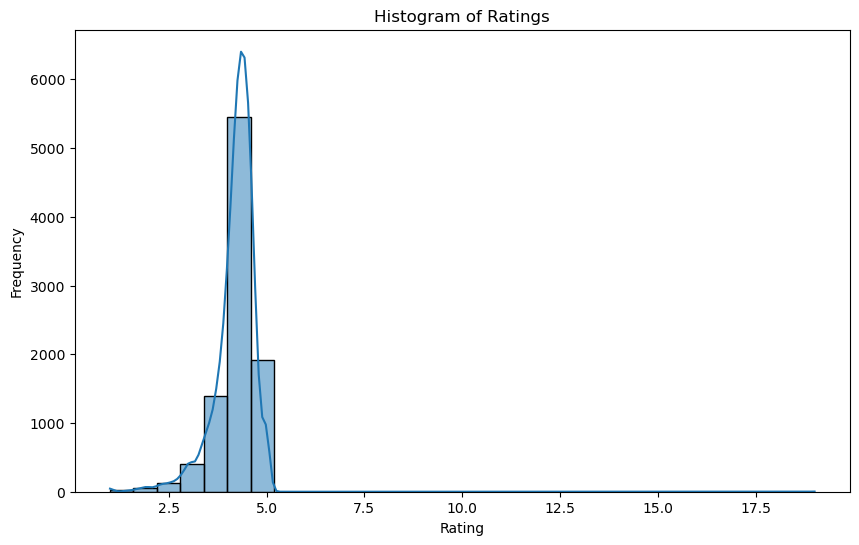

In [5]:
# Histogram of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=30, kde=True)
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

This plot provides insights into the distribution of ratings, showing how frequently different rating values occur in your dataset. The bins parameter controls the number of bins or intervals in the histogram, and kde=True adds a kernel density estimate line for a smoother representation of the distribution.

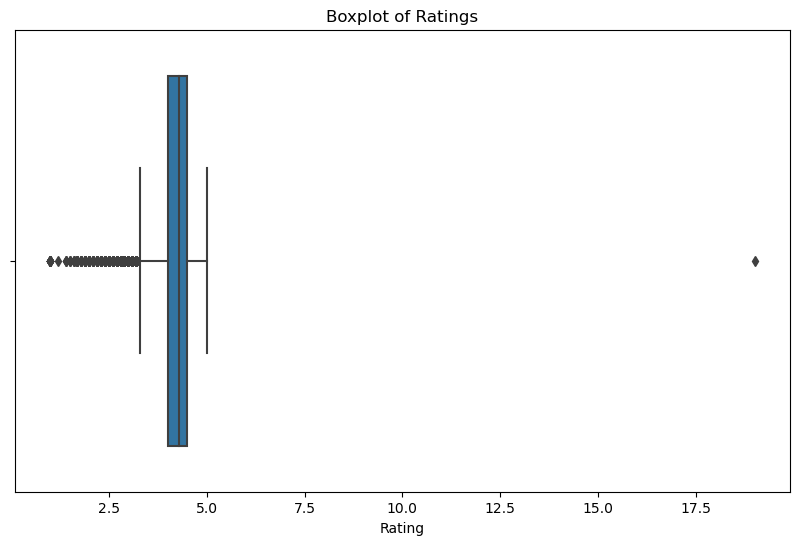

In [6]:
# Boxplot of Ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Rating'])
plt.title('Boxplot of Ratings')
plt.show()

In this plot, the box represents the interquartile range (IQR), the line inside the box is the median, and the whiskers extend to the minimum and maximum values within a certain range. Outliers, if present, are often shown as individual points beyond the whiskers. The boxplot provides a concise summary of the distribution of ratings and highlights any potential extreme values.

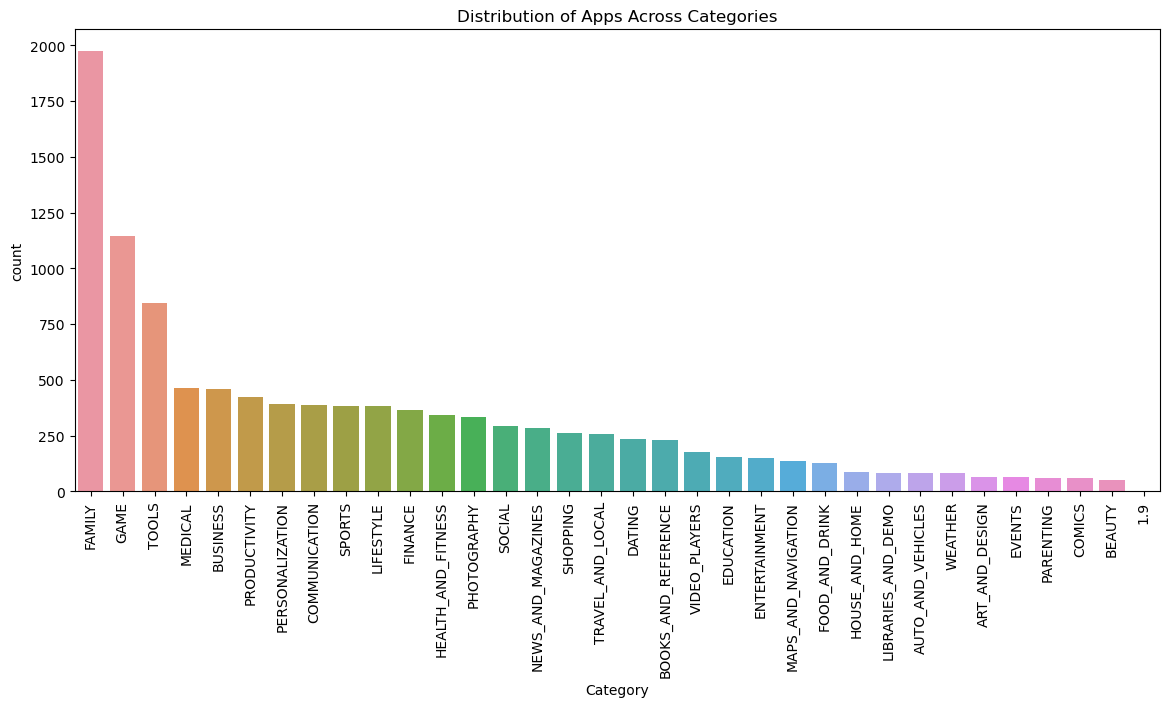

In [7]:
# Bar Chart of App Categories
plt.figure(figsize=(14, 6))
sns.countplot(x='Category', data=df, order=df['Category'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Apps Across Categories')
plt.show()

In this plot, each bar represents the count of apps in a specific category. The order parameter is used to order the categories based on their counts in descending order. Rotating the x-axis labels by 90 degrees enhances readability when dealing with a large number of categories. This chart provides insights into how apps are distributed across different categories in your dataset.

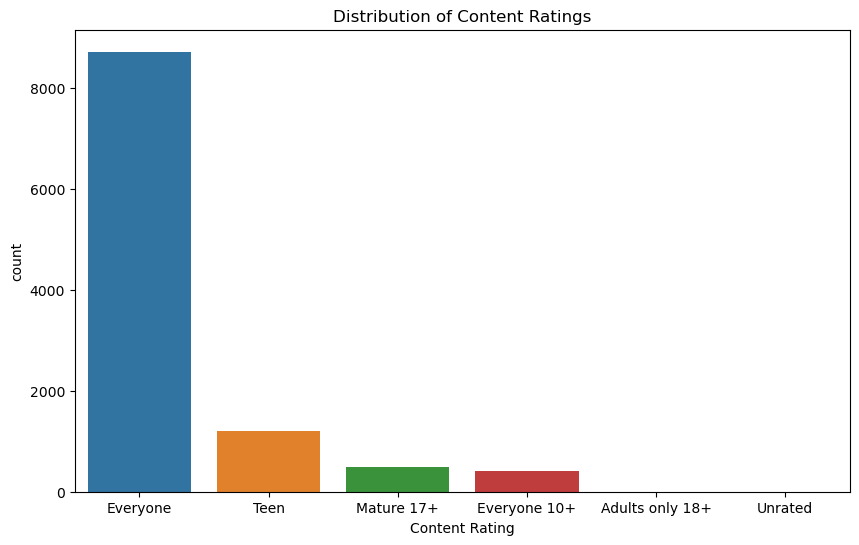

In [8]:
# Count Plot of Content Ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='Content Rating', data=df, order=df['Content Rating'].value_counts().index)
plt.title('Distribution of Content Ratings')
plt.show()

This plot displays the count of apps in each content rating category. The order parameter ensures that the content rating categories are ordered based on their counts in descending order. It helps you understand how apps are distributed across different content rating groups, providing insights into the target audience for the apps in your dataset.

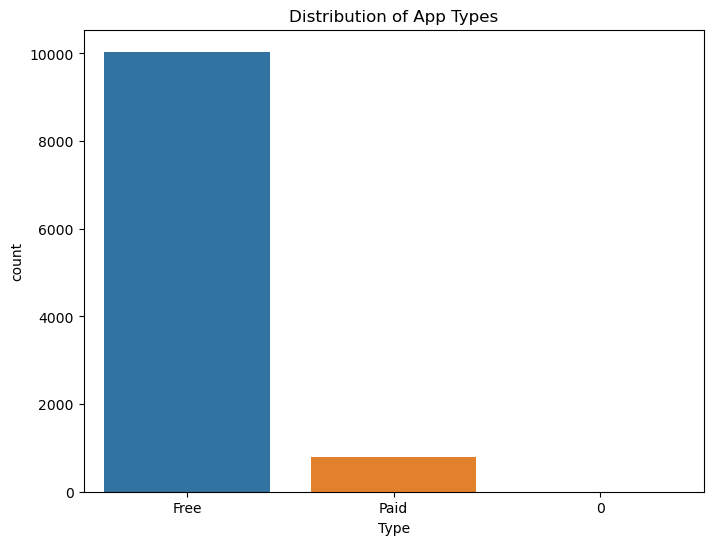

In [9]:
# Count Plot of App Types
plt.figure(figsize=(8, 6))
sns.countplot(x='Type', data=df)
plt.title('Distribution of App Types')
plt.show()

This plot displays the count of apps in each type category, distinguishing between free and paid apps. It provides a quick overview of how many apps in your dataset are free and how many are paid. Understanding this distribution is essential for analyzing the prevalence of each type in your dataset.

In [10]:
#Check if all the values in 'Reviews' are numeric
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
# Remove row where data is shifted to the right
df = df.drop(df.index[10472])

# Convert the data in 'Reviews' to int
df['Reviews'] = df['Reviews'].astype(int)

# Display concise information about the DataFrame after modifications
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.1+ MB


In [12]:
# Check the unique values in the 'Size' column
# This command displays an array of unique values present in the 'Size' column
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [13]:
# Remove suffixes ('M' and 'k') and convert to Megabytes
# Replace 'M' with '000' to handle sizes in megabytes
df['Size'] = df['Size'].str.replace('M', '000')
# Remove 'k' from sizes to handle sizes in kilobytes
df['Size'] = df['Size'].str.replace('k', '')
# Replace "Varies with device" with NaN for consistency
df['Size'] = df['Size'].replace("Varies with device", np.nan)
# Convert the 'Size' column to float data type
df['Size'] = df['Size'].astype('float')

# Convert sizes to Megabytes uniformly
# If size is less than 10 MB, convert to kilobytes and then to megabytes
for i in df['Size']:
    if i < 10:
        df['Size'] = df['Size'].replace(i, i * 1000)
# Convert all sizes to megabytes
df['Size'] = df['Size'] / 1000

# Display the 'Size' column after processing
df['Size']


0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10840, dtype: float64

In [14]:
# Check the unique values in the 'Installs' column
# This command displays an array of unique values present in the 'Installs' column
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [15]:
# Check the unique values in the 'Price' column
# This command displays an array of unique values present in the 'Price' column
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [16]:
# Remove suffixes, prefixes, and commas from specified columns
# Define a list of items to remove ('+', ',', '$')
items_to_remove = ['+', ',', '$']
# Specify the columns to clean
cols_to_clean = ['Installs', 'Price']

# Iterate over each item and each column to remove them
for item in items_to_remove:
    for col in cols_to_clean:
        df[col] = df[col].str.replace(item, '')

# Display the first few rows of the DataFrame after cleaning
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [17]:
# Check the unique values in the 'Installs' column after cleaning
# This command displays an array of unique values present in the 'Installs' column
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [18]:
# Check the unique values in the 'Price' column after cleaning
# This command displays an array of unique values present in the 'Price' column
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [19]:
# Convert 'Installs' to integer and 'Price' to float
df['Installs'] = df['Installs'].astype('int')
df['Price'] = df['Price'].astype('float')

# Display concise information about the DataFrame after conversions
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int32(2), object(8)
memory usage: 1.1+ MB


In [20]:
# Convert 'Last Updated' column from object to datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

# Display concise information about the DataFrame after the conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int32         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int32         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(2), object(7)
memory usage: 1.1+ MB


In [21]:
# Create columns for month and year from 'Last Updated'
df['Updated Month'] = df['Last Updated'].dt.month
df['Updated Year'] = df['Last Updated'].dt.year

# Drop the original 'Last Updated' column
df.drop('Last Updated', axis=1, inplace=True)

# Display the first few rows of the DataFrame after modifications
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Updated Month,Updated Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,6,2018


In [22]:
# Check the number of null values in each column
# This command displays the sum of null values for each column in the DataFrame
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Current Ver          8
Android Ver          2
Updated Month        0
Updated Year         0
dtype: int64

In [23]:
# Calculate the percentage of missing data for each column
# This command computes the percentage of null values for each column in the DataFrame
(df.isna().sum() / df.shape[0]) * 100

App                0.000000
Category           0.000000
Rating            13.597786
Reviews            0.000000
Size              15.636531
Installs           0.000000
Type               0.009225
Price              0.000000
Content Rating     0.000000
Genres             0.000000
Current Ver        0.073801
Android Ver        0.018450
Updated Month      0.000000
Updated Year       0.000000
dtype: float64

In [24]:
# Function to fill missing values with median
def impute_median(series):
    # Fill missing values with the median of the series
    return series.fillna(series.median())

In [25]:
# Filling mission values of 'Rating'

df['Rating'] = df['Rating'].transform(impute_median)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Updated Month   10840 non-null  int64  
 13  Updated Year    10840 non-null  int64  
dtypes: float64(3), int32(2), int64(2), object(7)
memory usage: 1.2+ MB


In [26]:
# Filling missing values of 'Size' with the median
df['Size'] = df['Size'].transform(impute_median)

# Display concise information about the DataFrame after filling missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Updated Month   10840 non-null  int64  
 13  Updated Year    10840 non-null  int64  
dtypes: float64(3), int32(2), int64(2), object(7)
memory usage: 1.2+ MB


In [27]:
# Fill missing values in 'Type' column with the mode
# Using inplace=True to modify the DataFrame in-place
df['Type'].fillna(str(df['Type'].mode().values[0]), inplace=True)


In [28]:
# Check the number of null values in each column after imputation
df.isnull().sum()


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Current Ver       8
Android Ver       2
Updated Month     0
Updated Year      0
dtype: int64

In [29]:
# Check the number of duplicated rows before removal
print(df.duplicated().sum())

# Remove duplicated rows
df.drop_duplicates(inplace=True)

# Check the number of duplicated rows after removal
print(df.duplicated().sum())


484
0


In [30]:
# Extract numerical features
# This command creates a list of column names for numerical features
num_features = [col for col in df.columns if df[col].dtype != 'object']
num_features


['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'Updated Month',
 'Updated Year']

In [31]:
# Extract categorical features
# This command creates a list of column names for categorical features
cat_features = [col for col in df.columns if df[col].dtype == 'object']
cat_features

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

After looking at the data, columns ['App', 'Genres', 'Current Ver', 'Android Ver'], are going to be removed.

App:
The name of the app is likely unique and does not contribute to predicting the rating. It can be removed.

Current Ver and Android Ver:
These columns may not have a direct impact on predicting the rating and can be removed unless you have specific reasons to believe otherwise.

Genres:
The 'Category' column already provides information about the genre or category of the app. If you find that 'Genres' is redundant, you can remove it.


In [32]:
# Drop specified columns from the DataFrame
# This command creates a new DataFrame 'df_clean' without the specified columns
columns_to_drop = ['App', 'Genres', 'Current Ver', 'Android Ver']
df_clean = df.drop(columns=columns_to_drop)


In [33]:
# Display the first few rows of the cleaned DataFrame
df_clean.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Updated Month,Updated Year
0,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,1,2018
1,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,1,2018
2,ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,8,2018
3,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,6,2018
4,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,6,2018


In [34]:
# Save the cleaned DataFrame to a CSV file
# Setting index=False to exclude the index column from the CSV file
df_clean.to_csv('df_clean.csv', index=False)


In [35]:
# Read the cleaned DataFrame from the CSV file
df = pd.read_csv('df_clean.csv')

# Display the first few rows of the DataFrame
df.head()


,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Updated Month,Updated Year
0,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,1,2018
1,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,1,2018
2,ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,8,2018
3,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,6,2018
4,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,6,2018


In [36]:
# Split the data for modeling, with the target variable 'Rating'
# Create features (X) and target variable (y)
X = df.copy().drop(columns=['Rating'])
y = df.copy()['Rating']

# Split the data into training and testing sets
# Using 80% for training and 20% for testing, with a random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
# Initialize an empty dictionary to store label encoder mappings
le_dict = defaultdict()

# Initialize an empty dictionary to store label mappings for reference
label_mappings = {}

# Identify categorical variables for label encoding
features_to_encode = X_train.select_dtypes(include=['category', 'object']).columns

# Loop through each categorical variable for label encoding
for col in features_to_encode:
    print(col)
    
    # Create a LabelEncoder for the current variable
    le = LabelEncoder()
    
    # Fit and transform the training data
    X_train[col] = le.fit_transform(X_train[col])
    
    # Transform the testing data
    X_test[col] = le.transform(X_test[col])
    
    # Save the label encoder for the current variable
    le_dict[col] = le
    
    # Create a mapping of original labels to encoded values for reference
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))


Category
Type
Content Rating


In [38]:
# Labels to be used in the html app
label_mappings

{'Category': {'ART_AND_DESIGN': 0,
  'AUTO_AND_VEHICLES': 1,
  'BEAUTY': 2,
  'BOOKS_AND_REFERENCE': 3,
  'BUSINESS': 4,
  'COMICS': 5,
  'COMMUNICATION': 6,
  'DATING': 7,
  'EDUCATION': 8,
  'ENTERTAINMENT': 9,
  'EVENTS': 10,
  'FAMILY': 11,
  'FINANCE': 12,
  'FOOD_AND_DRINK': 13,
  'GAME': 14,
  'HEALTH_AND_FITNESS': 15,
  'HOUSE_AND_HOME': 16,
  'LIBRARIES_AND_DEMO': 17,
  'LIFESTYLE': 18,
  'MAPS_AND_NAVIGATION': 19,
  'MEDICAL': 20,
  'NEWS_AND_MAGAZINES': 21,
  'PARENTING': 22,
  'PERSONALIZATION': 23,
  'PHOTOGRAPHY': 24,
  'PRODUCTIVITY': 25,
  'SHOPPING': 26,
  'SOCIAL': 27,
  'SPORTS': 28,
  'TOOLS': 29,
  'TRAVEL_AND_LOCAL': 30,
  'VIDEO_PLAYERS': 31,
  'WEATHER': 32},
 'Type': {'Free': 0, 'Paid': 1},
 'Content Rating': {'Adults only 18+': 0,
  'Everyone': 1,
  'Everyone 10+': 2,
  'Mature 17+': 3,
  'Teen': 4,
  'Unrated': 5}}

In [39]:
# Display the first few rows of the X_train DataFrame
X_train


,Category,Reviews,Size,Installs,Type,Price,Content Rating,Updated Month,Updated Year
1726,14,10538,50.0,1000000,0,0.00,3,8,2018
1047,13,151080,13.0,5000000,0,0.00,1,7,2018
4245,28,2506,13.0,50000,1,3.99,1,1,2017
8675,11,201631,96.0,5000000,0,0.00,1,6,2018
3206,32,178934,13.0,10000000,0,0.00,1,8,2018
...,...,...,...,...,...,...,...,...,...
5734,24,7118,9.2,1000000,0,0.00,1,6,2018
5191,14,27856,50.0,100000,1,2.99,4,4,2015
5390,18,484,13.0,1000,1,4.99,3,7,2018
860,10,26089,13.0,5000000,0,0.00,1,8,2018


In [40]:
# Display concise information about the X_train DataFrame
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8284 entries, 1726 to 7270
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        8284 non-null   int32  
 1   Reviews         8284 non-null   int64  
 2   Size            8284 non-null   float64
 3   Installs        8284 non-null   int64  
 4   Type            8284 non-null   int32  
 5   Price           8284 non-null   float64
 6   Content Rating  8284 non-null   int32  
 7   Updated Month   8284 non-null   int64  
 8   Updated Year    8284 non-null   int64  
dtypes: float64(2), int32(3), int64(4)
memory usage: 550.1 KB


In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Create a RandomForestRegressor
rf_regressor = RandomForestRegressor()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [None, 10, 15],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 4, 6]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model on the test set
y_pred = grid_search.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 15, 'n_estimators': 30}
Mean Squared Error on Test Set: 0.20302229842606526


In [42]:
# Train the model again with the best hyperparameters on the full training dataset
best_rf_regressor = RandomForestRegressor(**best_params)
best_rf_regressor.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, min_samples_leaf=6, min_samples_split=15,
                      n_estimators=30)

In [43]:
# Make predictions on the test set using the trained model
y_pred = best_rf_regressor.predict(X_test)

# Round the predicted values to one decimal place
y_pred = np.round(y_pred, decimals=1)

# Display the predicted values
y_pred


array([4.1, 4.1, 3.9, ..., 4.1, 4. , 4.3])

In [44]:
# Calculate the Mean Squared Error on the test set
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)


Mean Squared Error on Test Set: 0.2033204633204633


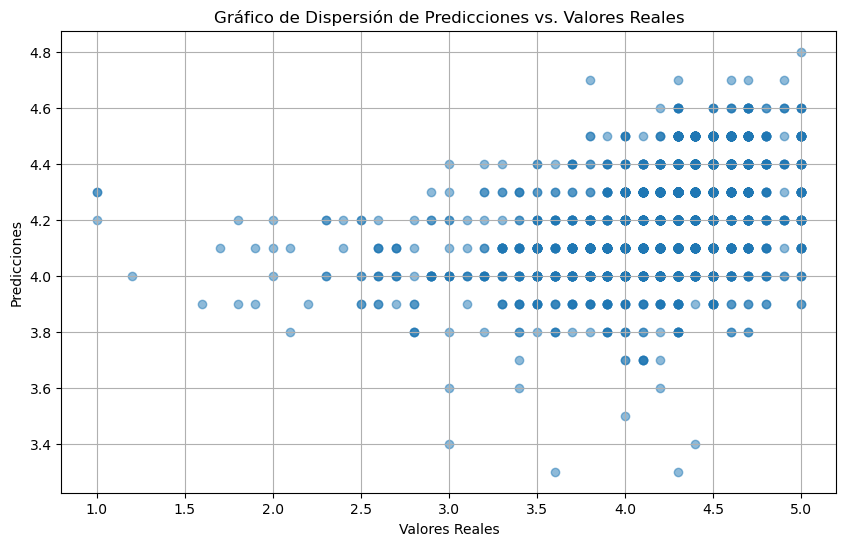

In [45]:
# Creating a Scatter Plot of Predictions vs Real Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Gráfico de Dispersión de Predicciones vs. Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid(True)
plt.show()

In [50]:
import joblib

# Save the trained RandomForestRegressor model to a file
joblib.dump(best_rf_regressor, 'models/rf_regressor.pkl')

['models/rf_regressor.pkl']

In [47]:
# Create a DataFrame for the new data point
new_data_point = pd.DataFrame({
    "Category": [14],
    "Reviews": [110538],
    "Size": [50.0],
    "Installs": [1000000],
    "Type": [0],
    "Price": [1.00],
    "Content Rating": [1],
    "Updated Month": [8],
    "Updated Year": [2018]
})

In [48]:
# Make predictions using the trained RandomForestRegressor model
prediction = best_rf_regressor.predict(new_data_point)

# Round the predicted rating to one decimal place
prediction = np.round(prediction, decimals=1)

# Display the predicted rating
prediction

array([4.4])